# Import library, create environment and quick review on the numbers info

In [1]:
#import gym library
import gym

#Import numpy and libraries for data processing and calculation
import numpy as np

#Import random 
import random

#Plotting library
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Implement the cart pole environment
env = gym.make("MountainCar-v0")

#Quick review on action spaces number and state space number of this environment
print("Number of action:",env.action_space)
print("Number of state for taxi:",env.observation_space)

Number of action: Discrete(3)
Number of state for taxi: Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)


# Q-learning method

1. Divide each observation range into 25 equal discrete bins,then combine to make discrete state to apply Q-learning later (because Q-table only works on discrete state environment, not continuous states)

In [2]:
#Create a table that store 20x20 state for each state is the combination of 25 bins of position and 25 bins of velocity 
bin_number = 20
discrete_bins = [bin_number,bin_number]

#The size of each bin (compute by subtracting the highest value by the lowest value of observation 
#and divided by the number of created bin: 25 for position and 25 for velocity)
each_bin_size = (env.observation_space.high-env.observation_space.low)/discrete_bins

#Check for the size of position and velocity amount in each bin
print(each_bin_size)

[0.09  0.007]


2. Design a function to convert the continuous state into discrete state using the created bins for each observation

In [3]:
#When we input a continuous state into this function, it convert into the discrete function based on the bins size created above
#by subtracting current continuous information of observation by the minimum of it, and divided by the bins size
def discrete_state(continuous_state):
    discretestate = (continuous_state - env.observation_space.low)//each_bin_size
    
    #Return a state as combination of integer locations of the bins (in the range of position and velocitiy)
    return tuple(discretestate.astype(np.int))

#Test the function
print(discrete_state(env.reset()))

(8, 10)


<ipython-input-3-3ae059394828>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discretestate.astype(np.int))


3. Create a Q-table using discrete states

In [4]:
#Create a 3-dimensional table with attribute of : position, velocity and action
Qtable = np.zeros(discrete_bins + [env.action_space.n])

#Check for the shape of Q-table
print(Qtable.shape)

#Create a policy that taking action has a highest Q-value return for each state (using Q-table) using argmax
def policy(state):
    return np.argmax(Qtable[state])

(20, 20, 3)


4. Initialize hyperparameter and runing the training episodes

In [5]:
#Hyperparameter
alpha = 0.1    #Learning_rate
gamma = 0.9    #Discounted_factor

In [6]:
#Create array to store the maximum position the car could get for each episode for training evaluation later:
maxpos_array = []

#Running 10000 training episode
for i in range(10000):
    print("Train ep:", i)
    
    # Separate continuous state to discrete value
    state = discrete_state(env.reset())

    #Set done = False
    done = False
    
    #Create variables to store maximum position for each episode could reach:
    maxpos = -1
    
    #Create a loop while done is true
    while (done!=True):    
        #Pull action based on policy
        action = policy(state)
        
        #Take output from action
        obs, rw, done, _ = env.step(action)
        
        #Update max position after every action
        if (obs[0]>maxpos):
            maxpos = obs[0]
        '''
        Render the environment for each 1000 episode to check for result
        if (i%1000==0):
            env.render()
        '''
            
        #Check if the action finish the problem yet (make the car to to the flag, because the problem has 2 episode termination)
        #If yes, check to see if the done == true because the car reach the flag or reach 200 action without reaching it's goal
        if (done == True):
            #Take the position of the observation and compare to the flag position (0.5)
            if (obs[0] > 0.5):
                maxpos_array.append(0.5)
            #else, the agent reach 200 action without reaching the flag
            else:
                maxpos_array.append(maxpos)
                
        #The action does not done the problem
        else:
            #Convert new observation state into discrete
            newstate = discrete_state(obs)

            #Update new Qvalue for an action in the state space using the given formula using the mentioned learning rate:
            #Q(state,action) ← (1−α)Q(state,action) + α(reward+γmax(a)Q(next state,all actions))
            oldvalue = Qtable[state+(action,)]
            newQvalue = (1-alpha)*oldvalue + alpha*( rw + gamma*np.max(Qtable[newstate]))
            Qtable[state+(action,)] = newQvalue

            #Update current state for next action is the new state
            state = newstate

print("Done training")

Train ep: 0
Train ep: 1
Train ep: 2
Train ep: 3
Train ep: 4
Train ep: 5
Train ep: 6
Train ep: 7
Train ep:

<ipython-input-3-3ae059394828>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discretestate.astype(np.int))


 8
Train ep: 9
Train ep: 10
Train ep: 11
Train ep: 12
Train ep: 13
Train ep: 14
Train ep: 15
Train ep: 16
Train ep: 17
Train ep: 18
Train ep: 19
Train ep: 20
Train ep: 21
Train ep: 22
Train ep: 23
Train ep: 24
Train ep: 25
Train ep: 26
Train ep: 27
Train ep: 28
Train ep: 29
Train ep: 30
Train ep: 31
Train ep: 32
Train ep: 33
Train ep: 34
Train ep: 35
Train ep: 36
Train ep: 37
Train ep: 38
Train ep: 39
Train ep: 40
Train ep: 41
Train ep: 42
Train ep: 43
Train ep: 44
Train ep: 45
Train ep: 46
Train ep: 47
Train ep: 48
Train ep: 49
Train ep: 50
Train ep: 51
Train ep: 52
Train ep: 53
Train ep: 54
Train ep: 55
Train ep: 56
Train ep: 57
Train ep: 58
Train ep: 59
Train ep: 60
Train ep: 61
Train ep: 62
Train ep: 63
Train ep: 64
Train ep: 65
Train ep: 66
Train ep: 67
Train ep: 68
Train ep: 69
Train ep: 70
Train ep: 71
Train ep: 72
Train ep: 73
Train ep: 74
Train ep: 75
Train ep: 76
Train ep: 77
Train ep: 78
Train ep: 79
Train ep: 80
Train ep: 81
Train ep: 82
Train ep: 83
Train ep: 84
Train ep: 

Train ep: 614
Train ep: 615
Train ep: 616
Train ep: 617
Train ep: 618
Train ep: 619
Train ep: 620
Train ep: 621
Train ep: 622
Train ep: 623
Train ep: 624
Train ep: 625
Train ep: 626
Train ep: 627
Train ep: 628
Train ep: 629
Train ep: 630
Train ep: 631
Train ep: 632
Train ep: 633
Train ep: 634
Train ep: 635
Train ep: 636
Train ep: 637
Train ep: 638
Train ep: 639
Train ep: 640
Train ep: 641
Train ep: 642
Train ep: 643
Train ep: 644
Train ep: 645
Train ep: 646
Train ep: 647
Train ep: 648
Train ep: 649
Train ep: 650
Train ep: 651
Train ep: 652
Train ep: 653
Train ep: 654
Train ep: 655
Train ep: 656
Train ep: 657
Train ep: 658
Train ep: 659
Train ep: 660
Train ep: 661
Train ep: 662
Train ep: 663
Train ep: 664
Train ep: 665
Train ep: 666
Train ep: 667
Train ep: 668
Train ep: 669
Train ep: 670
Train ep: 671
Train ep: 672
Train ep: 673
Train ep: 674
Train ep: 675
Train ep: 676
Train ep: 677
Train ep: 678
Train ep: 679
Train ep: 680
Train ep: 681
Train ep: 682
Train ep: 683
Train ep: 684
Train 

Train ep: 1190
Train ep: 1191
Train ep: 1192
Train ep: 1193
Train ep: 1194
Train ep: 1195
Train ep: 1196
Train ep: 1197
Train ep: 1198
Train ep: 1199
Train ep: 1200
Train ep: 1201
Train ep: 1202
Train ep: 1203
Train ep: 1204
Train ep: 1205
Train ep: 1206
Train ep: 1207
Train ep: 1208
Train ep: 1209
Train ep: 1210
Train ep: 1211
Train ep: 1212
Train ep: 1213
Train ep: 1214
Train ep: 1215
Train ep: 1216
Train ep: 1217
Train ep: 1218
Train ep: 1219
Train ep: 1220
Train ep: 1221
Train ep: 1222
Train ep: 1223
Train ep: 1224
Train ep: 1225
Train ep: 1226
Train ep: 1227
Train ep: 1228
Train ep: 1229
Train ep: 1230
Train ep: 1231
Train ep: 1232
Train ep: 1233
Train ep: 1234
Train ep: 1235
Train ep: 1236
Train ep: 1237
Train ep: 1238
Train ep: 1239
Train ep: 1240
Train ep: 1241
Train ep: 1242
Train ep: 1243
Train ep: 1244
Train ep: 1245
Train ep: 1246
Train ep: 1247
Train ep: 1248
Train ep: 1249
Train ep: 1250
Train ep: 1251
Train ep: 1252
Train ep: 1253
Train ep: 1254
Train ep: 1255
Train ep: 

Train ep: 1747
Train ep: 1748
Train ep: 1749
Train ep: 1750
Train ep: 1751
Train ep: 1752
Train ep: 1753
Train ep: 1754
Train ep: 1755
Train ep: 1756
Train ep: 1757
Train ep: 1758
Train ep: 1759
Train ep: 1760
Train ep: 1761
Train ep: 1762
Train ep: 1763
Train ep: 1764
Train ep: 1765
Train ep: 1766
Train ep: 1767
Train ep: 1768
Train ep: 1769
Train ep: 1770
Train ep: 1771
Train ep: 1772
Train ep: 1773
Train ep: 1774
Train ep: 1775
Train ep: 1776
Train ep: 1777
Train ep: 1778
Train ep: 1779
Train ep: 1780
Train ep: 1781
Train ep: 1782
Train ep: 1783
Train ep: 1784
Train ep: 1785
Train ep: 1786
Train ep: 1787
Train ep: 1788
Train ep: 1789
Train ep: 1790
Train ep: 1791
Train ep: 1792
Train ep: 1793
Train ep: 1794
Train ep: 1795
Train ep: 1796
Train ep: 1797
Train ep: 1798
Train ep: 1799
Train ep: 1800
Train ep: 1801
Train ep: 1802
Train ep: 1803
Train ep: 1804
Train ep: 1805
Train ep: 1806
Train ep: 1807
Train ep: 1808
Train ep: 1809
Train ep: 1810
Train ep: 1811
Train ep: 1812
Train ep: 

Train ep: 2302
Train ep: 2303
Train ep: 2304
Train ep: 2305
Train ep: 2306
Train ep: 2307
Train ep: 2308
Train ep: 2309
Train ep: 2310
Train ep: 2311
Train ep: 2312
Train ep: 2313
Train ep: 2314
Train ep: 2315
Train ep: 2316
Train ep: 2317
Train ep: 2318
Train ep: 2319
Train ep: 2320
Train ep: 2321
Train ep: 2322
Train ep: 2323
Train ep: 2324
Train ep: 2325
Train ep: 2326
Train ep: 2327
Train ep: 2328
Train ep: 2329
Train ep: 2330
Train ep: 2331
Train ep: 2332
Train ep: 2333
Train ep: 2334
Train ep: 2335
Train ep: 2336
Train ep: 2337
Train ep: 2338
Train ep: 2339
Train ep: 2340
Train ep: 2341
Train ep: 2342
Train ep: 2343
Train ep: 2344
Train ep: 2345
Train ep: 2346
Train ep: 2347
Train ep: 2348
Train ep: 2349
Train ep: 2350
Train ep: 2351
Train ep: 2352
Train ep: 2353
Train ep: 2354
Train ep: 2355
Train ep: 2356
Train ep: 2357
Train ep: 2358
Train ep: 2359
Train ep: 2360
Train ep: 2361
Train ep: 2362
Train ep: 2363
Train ep: 2364
Train ep: 2365
Train ep: 2366
Train ep: 2367
Train ep: 

Train ep: 2854
Train ep: 2855
Train ep: 2856
Train ep: 2857
Train ep: 2858
Train ep: 2859
Train ep: 2860
Train ep: 2861
Train ep: 2862
Train ep: 2863
Train ep: 2864
Train ep: 2865
Train ep: 2866
Train ep: 2867
Train ep: 2868
Train ep: 2869
Train ep: 2870
Train ep: 2871
Train ep: 2872
Train ep: 2873
Train ep: 2874
Train ep: 2875
Train ep: 2876
Train ep: 2877
Train ep: 2878
Train ep: 2879
Train ep: 2880
Train ep: 2881
Train ep: 2882
Train ep: 2883
Train ep: 2884
Train ep: 2885
Train ep: 2886
Train ep: 2887
Train ep: 2888
Train ep: 2889
Train ep: 2890
Train ep: 2891
Train ep: 2892
Train ep: 2893
Train ep: 2894
Train ep: 2895
Train ep: 2896
Train ep: 2897
Train ep: 2898
Train ep: 2899
Train ep: 2900
Train ep: 2901
Train ep: 2902
Train ep: 2903
Train ep: 2904
Train ep: 2905
Train ep: 2906
Train ep: 2907
Train ep: 2908
Train ep: 2909
Train ep: 2910
Train ep: 2911
Train ep: 2912
Train ep: 2913
Train ep: 2914
Train ep: 2915
Train ep: 2916
Train ep: 2917
Train ep: 2918
Train ep: 2919
Train ep: 

Train ep: 3412
Train ep: 3413
Train ep: 3414
Train ep: 3415
Train ep: 3416
Train ep: 3417
Train ep: 3418
Train ep: 3419
Train ep: 3420
Train ep: 3421
Train ep: 3422
Train ep: 3423
Train ep: 3424
Train ep: 3425
Train ep: 3426
Train ep: 3427
Train ep: 3428
Train ep: 3429
Train ep: 3430
Train ep: 3431
Train ep: 3432
Train ep: 3433
Train ep: 3434
Train ep: 3435
Train ep: 3436
Train ep: 3437
Train ep: 3438
Train ep: 3439
Train ep: 3440
Train ep: 3441
Train ep: 3442
Train ep: 3443
Train ep: 3444
Train ep: 3445
Train ep: 3446
Train ep: 3447
Train ep: 3448
Train ep: 3449
Train ep: 3450
Train ep: 3451
Train ep: 3452
Train ep: 3453
Train ep: 3454
Train ep: 3455
Train ep: 3456
Train ep: 3457
Train ep: 3458
Train ep: 3459
Train ep: 3460
Train ep: 3461
Train ep: 3462
Train ep: 3463
Train ep: 3464
Train ep: 3465
Train ep: 3466
Train ep: 3467
Train ep: 3468
Train ep: 3469
Train ep: 3470
Train ep: 3471
Train ep: 3472
Train ep: 3473
Train ep: 3474
Train ep: 3475
Train ep: 3476
Train ep: 3477
Train ep: 

Train ep: 3966
Train ep: 3967
Train ep: 3968
Train ep: 3969
Train ep: 3970
Train ep: 3971
Train ep: 3972
Train ep: 3973
Train ep: 3974
Train ep: 3975
Train ep: 3976
Train ep: 3977
Train ep: 3978
Train ep: 3979
Train ep: 3980
Train ep: 3981
Train ep: 3982
Train ep: 3983
Train ep: 3984
Train ep: 3985
Train ep: 3986
Train ep: 3987
Train ep: 3988
Train ep: 3989
Train ep: 3990
Train ep: 3991
Train ep: 3992
Train ep: 3993
Train ep: 3994
Train ep: 3995
Train ep: 3996
Train ep: 3997
Train ep: 3998
Train ep: 3999
Train ep: 4000
Train ep: 4001
Train ep: 4002
Train ep: 4003
Train ep: 4004
Train ep: 4005
Train ep: 4006
Train ep: 4007
Train ep: 4008
Train ep: 4009
Train ep: 4010
Train ep: 4011
Train ep: 4012
Train ep: 4013
Train ep: 4014
Train ep: 4015
Train ep: 4016
Train ep: 4017
Train ep: 4018
Train ep: 4019
Train ep: 4020
Train ep: 4021
Train ep: 4022
Train ep: 4023
Train ep: 4024
Train ep: 4025
Train ep: 4026
Train ep: 4027
Train ep: 4028
Train ep: 4029
Train ep: 4030
Train ep: 4031
Train ep: 

Train ep: 4532
Train ep: 4533
Train ep: 4534
Train ep: 4535
Train ep: 4536
Train ep: 4537
Train ep: 4538
Train ep: 4539
Train ep: 4540
Train ep: 4541
Train ep: 4542
Train ep: 4543
Train ep: 4544
Train ep: 4545
Train ep: 4546
Train ep: 4547
Train ep: 4548
Train ep: 4549
Train ep: 4550
Train ep: 4551
Train ep: 4552
Train ep: 4553
Train ep: 4554
Train ep: 4555
Train ep: 4556
Train ep: 4557
Train ep: 4558
Train ep: 4559
Train ep: 4560
Train ep: 4561
Train ep: 4562
Train ep: 4563
Train ep: 4564
Train ep: 4565
Train ep: 4566
Train ep: 4567
Train ep: 4568
Train ep: 4569
Train ep: 4570
Train ep: 4571
Train ep: 4572
Train ep: 4573
Train ep: 4574
Train ep: 4575
Train ep: 4576
Train ep: 4577
Train ep: 4578
Train ep: 4579
Train ep: 4580
Train ep: 4581
Train ep: 4582
Train ep: 4583
Train ep: 4584
Train ep: 4585
Train ep: 4586
Train ep: 4587
Train ep: 4588
Train ep: 4589
Train ep: 4590
Train ep: 4591
Train ep: 4592
Train ep: 4593
Train ep: 4594
Train ep: 4595
Train ep: 4596
Train ep: 4597
Train ep: 

Train ep: 5102
Train ep: 5103
Train ep: 5104
Train ep: 5105
Train ep: 5106
Train ep: 5107
Train ep: 5108
Train ep: 5109
Train ep: 5110
Train ep: 5111
Train ep: 5112
Train ep: 5113
Train ep: 5114
Train ep: 5115
Train ep: 5116
Train ep: 5117
Train ep: 5118
Train ep: 5119
Train ep: 5120
Train ep: 5121
Train ep: 5122
Train ep: 5123
Train ep: 5124
Train ep: 5125
Train ep: 5126
Train ep: 5127
Train ep: 5128
Train ep: 5129
Train ep: 5130
Train ep: 5131
Train ep: 5132
Train ep: 5133
Train ep: 5134
Train ep: 5135
Train ep: 5136
Train ep: 5137
Train ep: 5138
Train ep: 5139
Train ep: 5140
Train ep: 5141
Train ep: 5142
Train ep: 5143
Train ep: 5144
Train ep: 5145
Train ep: 5146
Train ep: 5147
Train ep: 5148
Train ep: 5149
Train ep: 5150
Train ep: 5151
Train ep: 5152
Train ep: 5153
Train ep: 5154
Train ep: 5155
Train ep: 5156
Train ep: 5157
Train ep: 5158
Train ep: 5159
Train ep: 5160
Train ep: 5161
Train ep: 5162
Train ep: 5163
Train ep: 5164
Train ep: 5165
Train ep: 5166
Train ep: 5167
Train ep: 

Train ep: 5653
Train ep: 5654
Train ep: 5655
Train ep: 5656
Train ep: 5657
Train ep: 5658
Train ep: 5659
Train ep: 5660
Train ep: 5661
Train ep: 5662
Train ep: 5663
Train ep: 5664
Train ep: 5665
Train ep: 5666
Train ep: 5667
Train ep: 5668
Train ep: 5669
Train ep: 5670
Train ep: 5671
Train ep: 5672
Train ep: 5673
Train ep: 5674
Train ep: 5675
Train ep: 5676
Train ep: 5677
Train ep: 5678
Train ep: 5679
Train ep: 5680
Train ep: 5681
Train ep: 5682
Train ep: 5683
Train ep: 5684
Train ep: 5685
Train ep: 5686
Train ep: 5687
Train ep: 5688
Train ep: 5689
Train ep: 5690
Train ep: 5691
Train ep: 5692
Train ep: 5693
Train ep: 5694
Train ep: 5695
Train ep: 5696
Train ep: 5697
Train ep: 5698
Train ep: 5699
Train ep: 5700
Train ep: 5701
Train ep: 5702
Train ep: 5703
Train ep: 5704
Train ep: 5705
Train ep: 5706
Train ep: 5707
Train ep: 5708
Train ep: 5709
Train ep: 5710
Train ep: 5711
Train ep: 5712
Train ep: 5713
Train ep: 5714
Train ep: 5715
Train ep: 5716
Train ep: 5717
Train ep: 5718
Train ep: 

Train ep: 6207
Train ep: 6208
Train ep: 6209
Train ep: 6210
Train ep: 6211
Train ep: 6212
Train ep: 6213
Train ep: 6214
Train ep: 6215
Train ep: 6216
Train ep: 6217
Train ep: 6218
Train ep: 6219
Train ep: 6220
Train ep: 6221
Train ep: 6222
Train ep: 6223
Train ep: 6224
Train ep: 6225
Train ep: 6226
Train ep: 6227
Train ep: 6228
Train ep: 6229
Train ep: 6230
Train ep: 6231
Train ep: 6232
Train ep: 6233
Train ep: 6234
Train ep: 6235
Train ep: 6236
Train ep: 6237
Train ep: 6238
Train ep: 6239
Train ep: 6240
Train ep: 6241
Train ep: 6242
Train ep: 6243
Train ep: 6244
Train ep: 6245
Train ep: 6246
Train ep: 6247
Train ep: 6248
Train ep: 6249
Train ep: 6250
Train ep: 6251
Train ep: 6252
Train ep: 6253
Train ep: 6254
Train ep: 6255
Train ep: 6256
Train ep: 6257
Train ep: 6258
Train ep: 6259
Train ep: 6260
Train ep: 6261
Train ep: 6262
Train ep: 6263
Train ep: 6264
Train ep: 6265
Train ep: 6266
Train ep: 6267
Train ep: 6268
Train ep: 6269
Train ep: 6270
Train ep: 6271
Train ep: 6272
Train ep: 

Train ep: 6765
Train ep: 6766
Train ep: 6767
Train ep: 6768
Train ep: 6769
Train ep: 6770
Train ep: 6771
Train ep: 6772
Train ep: 6773
Train ep: 6774
Train ep: 6775
Train ep: 6776
Train ep: 6777
Train ep: 6778
Train ep: 6779
Train ep: 6780
Train ep: 6781
Train ep: 6782
Train ep: 6783
Train ep: 6784
Train ep: 6785
Train ep: 6786
Train ep: 6787
Train ep: 6788
Train ep: 6789
Train ep: 6790
Train ep: 6791
Train ep: 6792
Train ep: 6793
Train ep: 6794
Train ep: 6795
Train ep: 6796
Train ep: 6797
Train ep: 6798
Train ep: 6799
Train ep: 6800
Train ep: 6801
Train ep: 6802
Train ep: 6803
Train ep: 6804
Train ep: 6805
Train ep: 6806
Train ep: 6807
Train ep: 6808
Train ep: 6809
Train ep: 6810
Train ep: 6811
Train ep: 6812
Train ep: 6813
Train ep: 6814
Train ep: 6815
Train ep: 6816
Train ep: 6817
Train ep: 6818
Train ep: 6819
Train ep: 6820
Train ep: 6821
Train ep: 6822
Train ep: 6823
Train ep: 6824
Train ep: 6825
Train ep: 6826
Train ep: 6827
Train ep: 6828
Train ep: 6829
Train ep: 6830
Train ep: 

Train ep: 7318
Train ep: 7319
Train ep: 7320
Train ep: 7321
Train ep: 7322
Train ep: 7323
Train ep: 7324
Train ep: 7325
Train ep: 7326
Train ep: 7327
Train ep: 7328
Train ep: 7329
Train ep: 7330
Train ep: 7331
Train ep: 7332
Train ep: 7333
Train ep: 7334
Train ep: 7335
Train ep: 7336
Train ep: 7337
Train ep: 7338
Train ep: 7339
Train ep: 7340
Train ep: 7341
Train ep: 7342
Train ep: 7343
Train ep: 7344
Train ep: 7345
Train ep: 7346
Train ep: 7347
Train ep: 7348
Train ep: 7349
Train ep: 7350
Train ep: 7351
Train ep: 7352
Train ep: 7353
Train ep: 7354
Train ep: 7355
Train ep: 7356
Train ep: 7357
Train ep: 7358
Train ep: 7359
Train ep: 7360
Train ep: 7361
Train ep: 7362
Train ep: 7363
Train ep: 7364
Train ep: 7365
Train ep: 7366
Train ep: 7367
Train ep: 7368
Train ep: 7369
Train ep: 7370
Train ep: 7371
Train ep: 7372
Train ep: 7373
Train ep: 7374
Train ep: 7375
Train ep: 7376
Train ep: 7377
Train ep: 7378
Train ep: 7379
Train ep: 7380
Train ep: 7381
Train ep: 7382
Train ep: 7383
Train ep: 

Train ep: 7887
Train ep: 7888
Train ep: 7889
Train ep: 7890
Train ep: 7891
Train ep: 7892
Train ep: 7893
Train ep: 7894
Train ep: 7895
Train ep: 7896
Train ep: 7897
Train ep: 7898
Train ep: 7899
Train ep: 7900
Train ep: 7901
Train ep: 7902
Train ep: 7903
Train ep: 7904
Train ep: 7905
Train ep: 7906
Train ep: 7907
Train ep: 7908
Train ep: 7909
Train ep: 7910
Train ep: 7911
Train ep: 7912
Train ep: 7913
Train ep: 7914
Train ep: 7915
Train ep: 7916
Train ep: 7917
Train ep: 7918
Train ep: 7919
Train ep: 7920
Train ep: 7921
Train ep: 7922
Train ep: 7923
Train ep: 7924
Train ep: 7925
Train ep: 7926
Train ep: 7927
Train ep: 7928
Train ep: 7929
Train ep: 7930
Train ep: 7931
Train ep: 7932
Train ep: 7933
Train ep: 7934
Train ep: 7935
Train ep: 7936
Train ep: 7937
Train ep: 7938
Train ep: 7939
Train ep: 7940
Train ep: 7941
Train ep: 7942
Train ep: 7943
Train ep: 7944
Train ep: 7945
Train ep: 7946
Train ep: 7947
Train ep: 7948
Train ep: 7949
Train ep: 7950
Train ep: 7951
Train ep: 7952
Train ep: 

Train ep: 8440
Train ep: 8441
Train ep: 8442
Train ep: 8443
Train ep: 8444
Train ep: 8445
Train ep: 8446
Train ep: 8447
Train ep: 8448
Train ep: 8449
Train ep: 8450
Train ep: 8451
Train ep: 8452
Train ep: 8453
Train ep: 8454
Train ep: 8455
Train ep: 8456
Train ep: 8457
Train ep: 8458
Train ep: 8459
Train ep: 8460
Train ep: 8461
Train ep: 8462
Train ep: 8463
Train ep: 8464
Train ep: 8465
Train ep: 8466
Train ep: 8467
Train ep: 8468
Train ep: 8469
Train ep: 8470
Train ep: 8471
Train ep: 8472
Train ep: 8473
Train ep: 8474
Train ep: 8475
Train ep: 8476
Train ep: 8477
Train ep: 8478
Train ep: 8479
Train ep: 8480
Train ep: 8481
Train ep: 8482
Train ep: 8483
Train ep: 8484
Train ep: 8485
Train ep: 8486
Train ep: 8487
Train ep: 8488
Train ep: 8489
Train ep: 8490
Train ep: 8491
Train ep: 8492
Train ep: 8493
Train ep: 8494
Train ep: 8495
Train ep: 8496
Train ep: 8497
Train ep: 8498
Train ep: 8499
Train ep: 8500
Train ep: 8501
Train ep: 8502
Train ep: 8503
Train ep: 8504
Train ep: 8505
Train ep: 

Train ep: 9004
Train ep: 9005
Train ep: 9006
Train ep: 9007
Train ep: 9008
Train ep: 9009
Train ep: 9010
Train ep: 9011
Train ep: 9012
Train ep: 9013
Train ep: 9014
Train ep: 9015
Train ep: 9016
Train ep: 9017
Train ep: 9018
Train ep: 9019
Train ep: 9020
Train ep: 9021
Train ep: 9022
Train ep: 9023
Train ep: 9024
Train ep: 9025
Train ep: 9026
Train ep: 9027
Train ep: 9028
Train ep: 9029
Train ep: 9030
Train ep: 9031
Train ep: 9032
Train ep: 9033
Train ep: 9034
Train ep: 9035
Train ep: 9036
Train ep: 9037
Train ep: 9038
Train ep: 9039
Train ep: 9040
Train ep: 9041
Train ep: 9042
Train ep: 9043
Train ep: 9044
Train ep: 9045
Train ep: 9046
Train ep: 9047
Train ep: 9048
Train ep: 9049
Train ep: 9050
Train ep: 9051
Train ep: 9052
Train ep: 9053
Train ep: 9054
Train ep: 9055
Train ep: 9056
Train ep: 9057
Train ep: 9058
Train ep: 9059
Train ep: 9060
Train ep: 9061
Train ep: 9062
Train ep: 9063
Train ep: 9064
Train ep: 9065
Train ep: 9066
Train ep: 9067
Train ep: 9068
Train ep: 9069
Train ep: 

Train ep: 9554
Train ep: 9555
Train ep: 9556
Train ep: 9557
Train ep: 9558
Train ep: 9559
Train ep: 9560
Train ep: 9561
Train ep: 9562
Train ep: 9563
Train ep: 9564
Train ep: 9565
Train ep: 9566
Train ep: 9567
Train ep: 9568
Train ep: 9569
Train ep: 9570
Train ep: 9571
Train ep: 9572
Train ep: 9573
Train ep: 9574
Train ep: 9575
Train ep: 9576
Train ep: 9577
Train ep: 9578
Train ep: 9579
Train ep: 9580
Train ep: 9581
Train ep: 9582
Train ep: 9583
Train ep: 9584
Train ep: 9585
Train ep: 9586
Train ep: 9587
Train ep: 9588
Train ep: 9589
Train ep: 9590
Train ep: 9591
Train ep: 9592
Train ep: 9593
Train ep: 9594
Train ep: 9595
Train ep: 9596
Train ep: 9597
Train ep: 9598
Train ep: 9599
Train ep: 9600
Train ep: 9601
Train ep: 9602
Train ep: 9603
Train ep: 9604
Train ep: 9605
Train ep: 9606
Train ep: 9607
Train ep: 9608
Train ep: 9609
Train ep: 9610
Train ep: 9611
Train ep: 9612
Train ep: 9613
Train ep: 9614
Train ep: 9615
Train ep: 9616
Train ep: 9617
Train ep: 9618
Train ep: 9619
Train ep: 

5. Q-learning evaluation by solve 100 episodes

In [7]:
#Create counter to count success time for 100 episode
succes_time = 0

#Loop through 100 episode
for i in range(100):
    # Separate continuous state to discrete value
    state = discrete_state(env.reset())

    #Set done = False
    done = False
    
    #Create a loop while done is true
    while (done!=True):    
        #Pull action based on policy
        action = policy(state)
        #Take output from action
        obs, rw, done, _ = env.step(action)

        '''
        Render the environment for each 1000 episode to check for result
        if (i%1000==0):
            env.render()
        '''
            
        #Check if the action finish the problem yet (make the car to to the flag, because the problem has 2 episode termination)
        #If yes, check to see if the done == true because the car reach the flag or reach 200 action without reaching it's goal
        if (done == True):
            #Take the position of the observation and compare to the flag position (0.5)
            if (obs[0] > 0.5):
                succes_time+=1
            #else, the agent reach 200 action without reaching the flag
            else:
                succes_time+=0
                
        #The action does not done the problem
        else:
            #Convert new observation state into discrete
            newstate = discrete_state(obs)

            #Update current state for next action is the new state
            state = newstate

print("Done testing, success time over 100 episodes:",succes_time)

<ipython-input-3-3ae059394828>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discretestate.astype(np.int))


Done testing, success time over 100 episodes: 71


6. Visualization (overview and specific)

([<matplotlib.axis.YTick at 0x262eb6aafa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

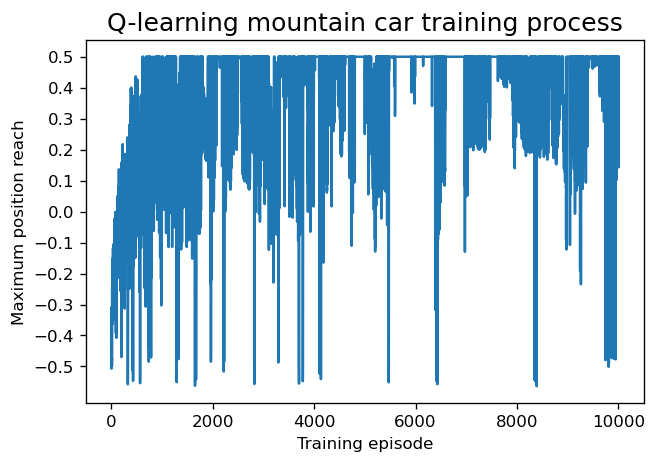

In [8]:
#Create variable x to store training episodes number from 1 to 10000
x = []
for i in range (1,10001):
    x.append(i)
    
#y is the result of all the episodes of training
y = maxpos_array

#Graph
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.plot(x, y)

#Name the elements
ax.set_title('Q-learning mountain car training process', fontsize=15)
ax.set_xlabel('Training episode', fontsize=10)
ax.set_ylabel('Maximum position reach', fontsize=10)

plt.yticks(np.arange(-0.5, 0.6,0.1))

([<matplotlib.axis.YTick at 0x262ec5ca820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

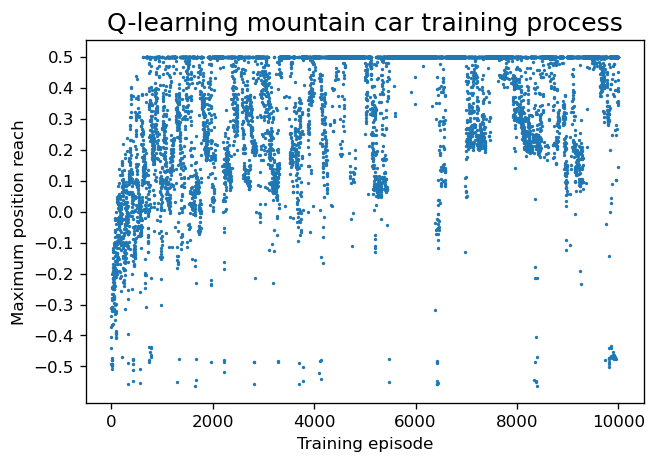

In [9]:
#Scatter for a better observation of the Q-learning method performance
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4), dpi=120)
plt.scatter(x, y,1)

#Name the elements
plt.title('Q-learning mountain car training process', fontsize=15)
plt.xlabel('Training episode', fontsize=10)
plt.ylabel('Maximum position reach', fontsize=10)

plt.yticks(np.arange(-0.5, 0.6,0.1))

# Applying TD(0) method for mountain car problem

reset the Q-table for reuse

In [10]:
Qtable = np.zeros(discrete_bins + [env.action_space.n])

New TD(0) training iteration with different formula to update Q-value after episode

In [11]:
#Create array to store the maximum position the car could get for each episode for training evaluation later:
maxpos_array = []

#Running 10000 training episode
for i in range(10000):
    print("Train ep:", i)
    
    # Separate continuous state to discrete value
    state = discrete_state(env.reset())

    #Set done = False
    done = False
    
    #Create variables to store maximum position for each episode could reach:
    maxpos = -1
    
    #Create an loop until the episode is solved
    while (done!= True):    
        #Pull action based on policy
        action = policy(state)
        
        #Take output from action
        obs, rw, done, _ = env.step(action)
        
        #Update max position after every action
        if (obs[0]>maxpos):
            maxpos = obs[0]
               
        #Convert new observation state into discrete, initialize new action based on the same policy
        newstate = discrete_state(obs)
        next_action = policy(newstate)
        
        #Update new Qvalue for an action in the state space using the TD(0) Learning formula:
            
        oldvalue = Qtable[state+(action,)]
        newQvalue = oldvalue + alpha*(rw + gamma*Qtable[newstate+(next_action,)] - oldvalue)
        Qtable[state+(action,)] = newQvalue

        #Update current state for next action is the new state
        state = newstate
    maxpos_array.append(maxpos)

print("Done training")

Train ep: 0
Train ep: 1
Train ep: 2
Train ep: 3
Train ep: 4
Train ep: 5
Train ep: 6
Train ep: 7
Train ep: 8
Train ep: 9
Train ep: 10
Train ep: 11
Train ep: 12
Train ep: 13
Train ep: 14
Train ep: 15
Train ep: 16


<ipython-input-3-3ae059394828>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discretestate.astype(np.int))


Train ep: 17
Train ep: 18
Train ep: 19
Train ep: 20
Train ep: 21
Train ep: 22
Train ep: 23
Train ep: 24
Train ep: 25
Train ep: 26
Train ep: 27
Train ep: 28
Train ep: 29
Train ep: 30
Train ep: 31
Train ep: 32
Train ep: 33
Train ep: 34
Train ep: 35
Train ep: 36
Train ep: 37
Train ep: 38
Train ep: 39
Train ep: 40
Train ep: 41
Train ep: 42
Train ep: 43
Train ep: 44
Train ep: 45
Train ep: 46
Train ep: 47
Train ep: 48
Train ep: 49
Train ep: 50
Train ep: 51
Train ep: 52
Train ep: 53
Train ep: 54
Train ep: 55
Train ep: 56
Train ep: 57
Train ep: 58
Train ep: 59
Train ep: 60
Train ep: 61
Train ep: 62
Train ep: 63
Train ep: 64
Train ep: 65
Train ep: 66
Train ep: 67
Train ep: 68
Train ep: 69
Train ep: 70
Train ep: 71
Train ep: 72
Train ep: 73
Train ep: 74
Train ep: 75
Train ep: 76
Train ep: 77
Train ep: 78
Train ep: 79
Train ep: 80
Train ep: 81
Train ep: 82
Train ep: 83
Train ep: 84
Train ep: 85
Train ep: 86
Train ep: 87
Train ep: 88
Train ep: 89
Train ep: 90
Train ep: 91
Train ep: 92
Train ep: 93

Train ep: 625
Train ep: 626
Train ep: 627
Train ep: 628
Train ep: 629
Train ep: 630
Train ep: 631
Train ep: 632
Train ep: 633
Train ep: 634
Train ep: 635
Train ep: 636
Train ep: 637
Train ep: 638
Train ep: 639
Train ep: 640
Train ep: 641
Train ep: 642
Train ep: 643
Train ep: 644
Train ep: 645
Train ep: 646
Train ep: 647
Train ep: 648
Train ep: 649
Train ep: 650
Train ep: 651
Train ep: 652
Train ep: 653
Train ep: 654
Train ep: 655
Train ep: 656
Train ep: 657
Train ep: 658
Train ep: 659
Train ep: 660
Train ep: 661
Train ep: 662
Train ep: 663
Train ep: 664
Train ep: 665
Train ep: 666
Train ep: 667
Train ep: 668
Train ep: 669
Train ep: 670
Train ep: 671
Train ep: 672
Train ep: 673
Train ep: 674
Train ep: 675
Train ep: 676
Train ep: 677
Train ep: 678
Train ep: 679
Train ep: 680
Train ep: 681
Train ep: 682
Train ep: 683
Train ep: 684
Train ep: 685
Train ep: 686
Train ep: 687
Train ep: 688
Train ep: 689
Train ep: 690
Train ep: 691
Train ep: 692
Train ep: 693
Train ep: 694
Train ep: 695
Train 

Train ep: 1198
Train ep: 1199
Train ep: 1200
Train ep: 1201
Train ep: 1202
Train ep: 1203
Train ep: 1204
Train ep: 1205
Train ep: 1206
Train ep: 1207
Train ep: 1208
Train ep: 1209
Train ep: 1210
Train ep: 1211
Train ep: 1212
Train ep: 1213
Train ep: 1214
Train ep: 1215
Train ep: 1216
Train ep: 1217
Train ep: 1218
Train ep: 1219
Train ep: 1220
Train ep: 1221
Train ep: 1222
Train ep: 1223
Train ep: 1224
Train ep: 1225
Train ep: 1226
Train ep: 1227
Train ep: 1228
Train ep: 1229
Train ep: 1230
Train ep: 1231
Train ep: 1232
Train ep: 1233
Train ep: 1234
Train ep: 1235
Train ep: 1236
Train ep: 1237
Train ep: 1238
Train ep: 1239
Train ep: 1240
Train ep: 1241
Train ep: 1242
Train ep: 1243
Train ep: 1244
Train ep: 1245
Train ep: 1246
Train ep: 1247
Train ep: 1248
Train ep: 1249
Train ep: 1250
Train ep: 1251
Train ep: 1252
Train ep: 1253
Train ep: 1254
Train ep: 1255
Train ep: 1256
Train ep: 1257
Train ep: 1258
Train ep: 1259
Train ep: 1260
Train ep: 1261
Train ep: 1262
Train ep: 1263
Train ep: 

Train ep: 1750
Train ep: 1751
Train ep: 1752
Train ep: 1753
Train ep: 1754
Train ep: 1755
Train ep: 1756
Train ep: 1757
Train ep: 1758
Train ep: 1759
Train ep: 1760
Train ep: 1761
Train ep: 1762
Train ep: 1763
Train ep: 1764
Train ep: 1765
Train ep: 1766
Train ep: 1767
Train ep: 1768
Train ep: 1769
Train ep: 1770
Train ep: 1771
Train ep: 1772
Train ep: 1773
Train ep: 1774
Train ep: 1775
Train ep: 1776
Train ep: 1777
Train ep: 1778
Train ep: 1779
Train ep: 1780
Train ep: 1781
Train ep: 1782
Train ep: 1783
Train ep: 1784
Train ep: 1785
Train ep: 1786
Train ep: 1787
Train ep: 1788
Train ep: 1789
Train ep: 1790
Train ep: 1791
Train ep: 1792
Train ep: 1793
Train ep: 1794
Train ep: 1795
Train ep: 1796
Train ep: 1797
Train ep: 1798
Train ep: 1799
Train ep: 1800
Train ep: 1801
Train ep: 1802
Train ep: 1803
Train ep: 1804
Train ep: 1805
Train ep: 1806
Train ep: 1807
Train ep: 1808
Train ep: 1809
Train ep: 1810
Train ep: 1811
Train ep: 1812
Train ep: 1813
Train ep: 1814
Train ep: 1815
Train ep: 

Train ep: 2306
Train ep: 2307
Train ep: 2308
Train ep: 2309
Train ep: 2310
Train ep: 2311
Train ep: 2312
Train ep: 2313
Train ep: 2314
Train ep: 2315
Train ep: 2316
Train ep: 2317
Train ep: 2318
Train ep: 2319
Train ep: 2320
Train ep: 2321
Train ep: 2322
Train ep: 2323
Train ep: 2324
Train ep: 2325
Train ep: 2326
Train ep: 2327
Train ep: 2328
Train ep: 2329
Train ep: 2330
Train ep: 2331
Train ep: 2332
Train ep: 2333
Train ep: 2334
Train ep: 2335
Train ep: 2336
Train ep: 2337
Train ep: 2338
Train ep: 2339
Train ep: 2340
Train ep: 2341
Train ep: 2342
Train ep: 2343
Train ep: 2344
Train ep: 2345
Train ep: 2346
Train ep: 2347
Train ep: 2348
Train ep: 2349
Train ep: 2350
Train ep: 2351
Train ep: 2352
Train ep: 2353
Train ep: 2354
Train ep: 2355
Train ep: 2356
Train ep: 2357
Train ep: 2358
Train ep: 2359
Train ep: 2360
Train ep: 2361
Train ep: 2362
Train ep: 2363
Train ep: 2364
Train ep: 2365
Train ep: 2366
Train ep: 2367
Train ep: 2368
Train ep: 2369
Train ep: 2370
Train ep: 2371
Train ep: 

Train ep: 2857
Train ep: 2858
Train ep: 2859
Train ep: 2860
Train ep: 2861
Train ep: 2862
Train ep: 2863
Train ep: 2864
Train ep: 2865
Train ep: 2866
Train ep: 2867
Train ep: 2868
Train ep: 2869
Train ep: 2870
Train ep: 2871
Train ep: 2872
Train ep: 2873
Train ep: 2874
Train ep: 2875
Train ep: 2876
Train ep: 2877
Train ep: 2878
Train ep: 2879
Train ep: 2880
Train ep: 2881
Train ep: 2882
Train ep: 2883
Train ep: 2884
Train ep: 2885
Train ep: 2886
Train ep: 2887
Train ep: 2888
Train ep: 2889
Train ep: 2890
Train ep: 2891
Train ep: 2892
Train ep: 2893
Train ep: 2894
Train ep: 2895
Train ep: 2896
Train ep: 2897
Train ep: 2898
Train ep: 2899
Train ep: 2900
Train ep: 2901
Train ep: 2902
Train ep: 2903
Train ep: 2904
Train ep: 2905
Train ep: 2906
Train ep: 2907
Train ep: 2908
Train ep: 2909
Train ep: 2910
Train ep: 2911
Train ep: 2912
Train ep: 2913
Train ep: 2914
Train ep: 2915
Train ep: 2916
Train ep: 2917
Train ep: 2918
Train ep: 2919
Train ep: 2920
Train ep: 2921
Train ep: 2922
Train ep: 

Train ep: 3412
Train ep: 3413
Train ep: 3414
Train ep: 3415
Train ep: 3416
Train ep: 3417
Train ep: 3418
Train ep: 3419
Train ep: 3420
Train ep: 3421
Train ep: 3422
Train ep: 3423
Train ep: 3424
Train ep: 3425
Train ep: 3426
Train ep: 3427
Train ep: 3428
Train ep: 3429
Train ep: 3430
Train ep: 3431
Train ep: 3432
Train ep: 3433
Train ep: 3434
Train ep: 3435
Train ep: 3436
Train ep: 3437
Train ep: 3438
Train ep: 3439
Train ep: 3440
Train ep: 3441
Train ep: 3442
Train ep: 3443
Train ep: 3444
Train ep: 3445
Train ep: 3446
Train ep: 3447
Train ep: 3448
Train ep: 3449
Train ep: 3450
Train ep: 3451
Train ep: 3452
Train ep: 3453
Train ep: 3454
Train ep: 3455
Train ep: 3456
Train ep: 3457
Train ep: 3458
Train ep: 3459
Train ep: 3460
Train ep: 3461
Train ep: 3462
Train ep: 3463
Train ep: 3464
Train ep: 3465
Train ep: 3466
Train ep: 3467
Train ep: 3468
Train ep: 3469
Train ep: 3470
Train ep: 3471
Train ep: 3472
Train ep: 3473
Train ep: 3474
Train ep: 3475
Train ep: 3476
Train ep: 3477
Train ep: 

Train ep: 3973
Train ep: 3974
Train ep: 3975
Train ep: 3976
Train ep: 3977
Train ep: 3978
Train ep: 3979
Train ep: 3980
Train ep: 3981
Train ep: 3982
Train ep: 3983
Train ep: 3984
Train ep: 3985
Train ep: 3986
Train ep: 3987
Train ep: 3988
Train ep: 3989
Train ep: 3990
Train ep: 3991
Train ep: 3992
Train ep: 3993
Train ep: 3994
Train ep: 3995
Train ep: 3996
Train ep: 3997
Train ep: 3998
Train ep: 3999
Train ep: 4000
Train ep: 4001
Train ep: 4002
Train ep: 4003
Train ep: 4004
Train ep: 4005
Train ep: 4006
Train ep: 4007
Train ep: 4008
Train ep: 4009
Train ep: 4010
Train ep: 4011
Train ep: 4012
Train ep: 4013
Train ep: 4014
Train ep: 4015
Train ep: 4016
Train ep: 4017
Train ep: 4018
Train ep: 4019
Train ep: 4020
Train ep: 4021
Train ep: 4022
Train ep: 4023
Train ep: 4024
Train ep: 4025
Train ep: 4026
Train ep: 4027
Train ep: 4028
Train ep: 4029
Train ep: 4030
Train ep: 4031
Train ep: 4032
Train ep: 4033
Train ep: 4034
Train ep: 4035
Train ep: 4036
Train ep: 4037
Train ep: 4038
Train ep: 

Train ep: 4531
Train ep: 4532
Train ep: 4533
Train ep: 4534
Train ep: 4535
Train ep: 4536
Train ep: 4537
Train ep: 4538
Train ep: 4539
Train ep: 4540
Train ep: 4541
Train ep: 4542
Train ep: 4543
Train ep: 4544
Train ep: 4545
Train ep: 4546
Train ep: 4547
Train ep: 4548
Train ep: 4549
Train ep: 4550
Train ep: 4551
Train ep: 4552
Train ep: 4553
Train ep: 4554
Train ep: 4555
Train ep: 4556
Train ep: 4557
Train ep: 4558
Train ep: 4559
Train ep: 4560
Train ep: 4561
Train ep: 4562
Train ep: 4563
Train ep: 4564
Train ep: 4565
Train ep: 4566
Train ep: 4567
Train ep: 4568
Train ep: 4569
Train ep: 4570
Train ep: 4571
Train ep: 4572
Train ep: 4573
Train ep: 4574
Train ep: 4575
Train ep: 4576
Train ep: 4577
Train ep: 4578
Train ep: 4579
Train ep: 4580
Train ep: 4581
Train ep: 4582
Train ep: 4583
Train ep: 4584
Train ep: 4585
Train ep: 4586
Train ep: 4587
Train ep: 4588
Train ep: 4589
Train ep: 4590
Train ep: 4591
Train ep: 4592
Train ep: 4593
Train ep: 4594
Train ep: 4595
Train ep: 4596
Train ep: 

Train ep: 5095
Train ep: 5096
Train ep: 5097
Train ep: 5098
Train ep: 5099
Train ep: 5100
Train ep: 5101
Train ep: 5102
Train ep: 5103
Train ep: 5104
Train ep: 5105
Train ep: 5106
Train ep: 5107
Train ep: 5108
Train ep: 5109
Train ep: 5110
Train ep: 5111
Train ep: 5112
Train ep: 5113
Train ep: 5114
Train ep: 5115
Train ep: 5116
Train ep: 5117
Train ep: 5118
Train ep: 5119
Train ep: 5120
Train ep: 5121
Train ep: 5122
Train ep: 5123
Train ep: 5124
Train ep: 5125
Train ep: 5126
Train ep: 5127
Train ep: 5128
Train ep: 5129
Train ep: 5130
Train ep: 5131
Train ep: 5132
Train ep: 5133
Train ep: 5134
Train ep: 5135
Train ep: 5136
Train ep: 5137
Train ep: 5138
Train ep: 5139
Train ep: 5140
Train ep: 5141
Train ep: 5142
Train ep: 5143
Train ep: 5144
Train ep: 5145
Train ep: 5146
Train ep: 5147
Train ep: 5148
Train ep: 5149
Train ep: 5150
Train ep: 5151
Train ep: 5152
Train ep: 5153
Train ep: 5154
Train ep: 5155
Train ep: 5156
Train ep: 5157
Train ep: 5158
Train ep: 5159
Train ep: 5160
Train ep: 

Train ep: 5655
Train ep: 5656
Train ep: 5657
Train ep: 5658
Train ep: 5659
Train ep: 5660
Train ep: 5661
Train ep: 5662
Train ep: 5663
Train ep: 5664
Train ep: 5665
Train ep: 5666
Train ep: 5667
Train ep: 5668
Train ep: 5669
Train ep: 5670
Train ep: 5671
Train ep: 5672
Train ep: 5673
Train ep: 5674
Train ep: 5675
Train ep: 5676
Train ep: 5677
Train ep: 5678
Train ep: 5679
Train ep: 5680
Train ep: 5681
Train ep: 5682
Train ep: 5683
Train ep: 5684
Train ep: 5685
Train ep: 5686
Train ep: 5687
Train ep: 5688
Train ep: 5689
Train ep: 5690
Train ep: 5691
Train ep: 5692
Train ep: 5693
Train ep: 5694
Train ep: 5695
Train ep: 5696
Train ep: 5697
Train ep: 5698
Train ep: 5699
Train ep: 5700
Train ep: 5701
Train ep: 5702
Train ep: 5703
Train ep: 5704
Train ep: 5705
Train ep: 5706
Train ep: 5707
Train ep: 5708
Train ep: 5709
Train ep: 5710
Train ep: 5711
Train ep: 5712
Train ep: 5713
Train ep: 5714
Train ep: 5715
Train ep: 5716
Train ep: 5717
Train ep: 5718
Train ep: 5719
Train ep: 5720
Train ep: 

Train ep: 6218
Train ep: 6219
Train ep: 6220
Train ep: 6221
Train ep: 6222
Train ep: 6223
Train ep: 6224
Train ep: 6225
Train ep: 6226
Train ep: 6227
Train ep: 6228
Train ep: 6229
Train ep: 6230
Train ep: 6231
Train ep: 6232
Train ep: 6233
Train ep: 6234
Train ep: 6235
Train ep: 6236
Train ep: 6237
Train ep: 6238
Train ep: 6239
Train ep: 6240
Train ep: 6241
Train ep: 6242
Train ep: 6243
Train ep: 6244
Train ep: 6245
Train ep: 6246
Train ep: 6247
Train ep: 6248
Train ep: 6249
Train ep: 6250
Train ep: 6251
Train ep: 6252
Train ep: 6253
Train ep: 6254
Train ep: 6255
Train ep: 6256
Train ep: 6257
Train ep: 6258
Train ep: 6259
Train ep: 6260
Train ep: 6261
Train ep: 6262
Train ep: 6263
Train ep: 6264
Train ep: 6265
Train ep: 6266
Train ep: 6267
Train ep: 6268
Train ep: 6269
Train ep: 6270
Train ep: 6271
Train ep: 6272
Train ep: 6273
Train ep: 6274
Train ep: 6275
Train ep: 6276
Train ep: 6277
Train ep: 6278
Train ep: 6279
Train ep: 6280
Train ep: 6281
Train ep: 6282
Train ep: 6283
Train ep: 

Train ep: 6776
Train ep: 6777
Train ep: 6778
Train ep: 6779
Train ep: 6780
Train ep: 6781
Train ep: 6782
Train ep: 6783
Train ep: 6784
Train ep: 6785
Train ep: 6786
Train ep: 6787
Train ep: 6788
Train ep: 6789
Train ep: 6790
Train ep: 6791
Train ep: 6792
Train ep: 6793
Train ep: 6794
Train ep: 6795
Train ep: 6796
Train ep: 6797
Train ep: 6798
Train ep: 6799
Train ep: 6800
Train ep: 6801
Train ep: 6802
Train ep: 6803
Train ep: 6804
Train ep: 6805
Train ep: 6806
Train ep: 6807
Train ep: 6808
Train ep: 6809
Train ep: 6810
Train ep: 6811
Train ep: 6812
Train ep: 6813
Train ep: 6814
Train ep: 6815
Train ep: 6816
Train ep: 6817
Train ep: 6818
Train ep: 6819
Train ep: 6820
Train ep: 6821
Train ep: 6822
Train ep: 6823
Train ep: 6824
Train ep: 6825
Train ep: 6826
Train ep: 6827
Train ep: 6828
Train ep: 6829
Train ep: 6830
Train ep: 6831
Train ep: 6832
Train ep: 6833
Train ep: 6834
Train ep: 6835
Train ep: 6836
Train ep: 6837
Train ep: 6838
Train ep: 6839
Train ep: 6840
Train ep: 6841
Train ep: 

Train ep: 7334
Train ep: 7335
Train ep: 7336
Train ep: 7337
Train ep: 7338
Train ep: 7339
Train ep: 7340
Train ep: 7341
Train ep: 7342
Train ep: 7343
Train ep: 7344
Train ep: 7345
Train ep: 7346
Train ep: 7347
Train ep: 7348
Train ep: 7349
Train ep: 7350
Train ep: 7351
Train ep: 7352
Train ep: 7353
Train ep: 7354
Train ep: 7355
Train ep: 7356
Train ep: 7357
Train ep: 7358
Train ep: 7359
Train ep: 7360
Train ep: 7361
Train ep: 7362
Train ep: 7363
Train ep: 7364
Train ep: 7365
Train ep: 7366
Train ep: 7367
Train ep: 7368
Train ep: 7369
Train ep: 7370
Train ep: 7371
Train ep: 7372
Train ep: 7373
Train ep: 7374
Train ep: 7375
Train ep: 7376
Train ep: 7377
Train ep: 7378
Train ep: 7379
Train ep: 7380
Train ep: 7381
Train ep: 7382
Train ep: 7383
Train ep: 7384
Train ep: 7385
Train ep: 7386
Train ep: 7387
Train ep: 7388
Train ep: 7389
Train ep: 7390
Train ep: 7391
Train ep: 7392
Train ep: 7393
Train ep: 7394
Train ep: 7395
Train ep: 7396
Train ep: 7397
Train ep: 7398
Train ep: 7399
Train ep: 

Train ep: 7887
Train ep: 7888
Train ep: 7889
Train ep: 7890
Train ep: 7891
Train ep: 7892
Train ep: 7893
Train ep: 7894
Train ep: 7895
Train ep: 7896
Train ep: 7897
Train ep: 7898
Train ep: 7899
Train ep: 7900
Train ep: 7901
Train ep: 7902
Train ep: 7903
Train ep: 7904
Train ep: 7905
Train ep: 7906
Train ep: 7907
Train ep: 7908
Train ep: 7909
Train ep: 7910
Train ep: 7911
Train ep: 7912
Train ep: 7913
Train ep: 7914
Train ep: 7915
Train ep: 7916
Train ep: 7917
Train ep: 7918
Train ep: 7919
Train ep: 7920
Train ep: 7921
Train ep: 7922
Train ep: 7923
Train ep: 7924
Train ep: 7925
Train ep: 7926
Train ep: 7927
Train ep: 7928
Train ep: 7929
Train ep: 7930
Train ep: 7931
Train ep: 7932
Train ep: 7933
Train ep: 7934
Train ep: 7935
Train ep: 7936
Train ep: 7937
Train ep: 7938
Train ep: 7939
Train ep: 7940
Train ep: 7941
Train ep: 7942
Train ep: 7943
Train ep: 7944
Train ep: 7945
Train ep: 7946
Train ep: 7947
Train ep: 7948
Train ep: 7949
Train ep: 7950
Train ep: 7951
Train ep: 7952
Train ep: 

Train ep: 8452
Train ep: 8453
Train ep: 8454
Train ep: 8455
Train ep: 8456
Train ep: 8457
Train ep: 8458
Train ep: 8459
Train ep: 8460
Train ep: 8461
Train ep: 8462
Train ep: 8463
Train ep: 8464
Train ep: 8465
Train ep: 8466
Train ep: 8467
Train ep: 8468
Train ep: 8469
Train ep: 8470
Train ep: 8471
Train ep: 8472
Train ep: 8473
Train ep: 8474
Train ep: 8475
Train ep: 8476
Train ep: 8477
Train ep: 8478
Train ep: 8479
Train ep: 8480
Train ep: 8481
Train ep: 8482
Train ep: 8483
Train ep: 8484
Train ep: 8485
Train ep: 8486
Train ep: 8487
Train ep: 8488
Train ep: 8489
Train ep: 8490
Train ep: 8491
Train ep: 8492
Train ep: 8493
Train ep: 8494
Train ep: 8495
Train ep: 8496
Train ep: 8497
Train ep: 8498
Train ep: 8499
Train ep: 8500
Train ep: 8501
Train ep: 8502
Train ep: 8503
Train ep: 8504
Train ep: 8505
Train ep: 8506
Train ep: 8507
Train ep: 8508
Train ep: 8509
Train ep: 8510
Train ep: 8511
Train ep: 8512
Train ep: 8513
Train ep: 8514
Train ep: 8515
Train ep: 8516
Train ep: 8517
Train ep: 

Train ep: 9003
Train ep: 9004
Train ep: 9005
Train ep: 9006
Train ep: 9007
Train ep: 9008
Train ep: 9009
Train ep: 9010
Train ep: 9011
Train ep: 9012
Train ep: 9013
Train ep: 9014
Train ep: 9015
Train ep: 9016
Train ep: 9017
Train ep: 9018
Train ep: 9019
Train ep: 9020
Train ep: 9021
Train ep: 9022
Train ep: 9023
Train ep: 9024
Train ep: 9025
Train ep: 9026
Train ep: 9027
Train ep: 9028
Train ep: 9029
Train ep: 9030
Train ep: 9031
Train ep: 9032
Train ep: 9033
Train ep: 9034
Train ep: 9035
Train ep: 9036
Train ep: 9037
Train ep: 9038
Train ep: 9039
Train ep: 9040
Train ep: 9041
Train ep: 9042
Train ep: 9043
Train ep: 9044
Train ep: 9045
Train ep: 9046
Train ep: 9047
Train ep: 9048
Train ep: 9049
Train ep: 9050
Train ep: 9051
Train ep: 9052
Train ep: 9053
Train ep: 9054
Train ep: 9055
Train ep: 9056
Train ep: 9057
Train ep: 9058
Train ep: 9059
Train ep: 9060
Train ep: 9061
Train ep: 9062
Train ep: 9063
Train ep: 9064
Train ep: 9065
Train ep: 9066
Train ep: 9067
Train ep: 9068
Train ep: 

Train ep: 9552
Train ep: 9553
Train ep: 9554
Train ep: 9555
Train ep: 9556
Train ep: 9557
Train ep: 9558
Train ep: 9559
Train ep: 9560
Train ep: 9561
Train ep: 9562
Train ep: 9563
Train ep: 9564
Train ep: 9565
Train ep: 9566
Train ep: 9567
Train ep: 9568
Train ep: 9569
Train ep: 9570
Train ep: 9571
Train ep: 9572
Train ep: 9573
Train ep: 9574
Train ep: 9575
Train ep: 9576
Train ep: 9577
Train ep: 9578
Train ep: 9579
Train ep: 9580
Train ep: 9581
Train ep: 9582
Train ep: 9583
Train ep: 9584
Train ep: 9585
Train ep: 9586
Train ep: 9587
Train ep: 9588
Train ep: 9589
Train ep: 9590
Train ep: 9591
Train ep: 9592
Train ep: 9593
Train ep: 9594
Train ep: 9595
Train ep: 9596
Train ep: 9597
Train ep: 9598
Train ep: 9599
Train ep: 9600
Train ep: 9601
Train ep: 9602
Train ep: 9603
Train ep: 9604
Train ep: 9605
Train ep: 9606
Train ep: 9607
Train ep: 9608
Train ep: 9609
Train ep: 9610
Train ep: 9611
Train ep: 9612
Train ep: 9613
Train ep: 9614
Train ep: 9615
Train ep: 9616
Train ep: 9617
Train ep: 

([<matplotlib.axis.YTick at 0x262eb626760>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

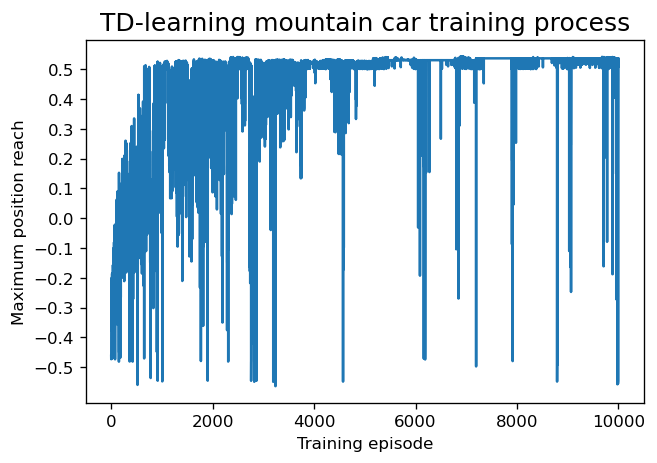

In [12]:
#Create variable x to store training episodes number from 1 to 10000
x = []
for i in range (1,10001):
    x.append(i)
    
#y is the result of episode of training in TD(0) method
y = maxpos_array

#Graph
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.plot(x, y)

#Name the elements
ax.set_title('TD-learning mountain car training process', fontsize=15)
ax.set_xlabel('Training episode', fontsize=10)
ax.set_ylabel('Maximum position reach', fontsize=10)

plt.yticks(np.arange(-0.5, 0.6,0.1))


([<matplotlib.axis.YTick at 0x262ebed04c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

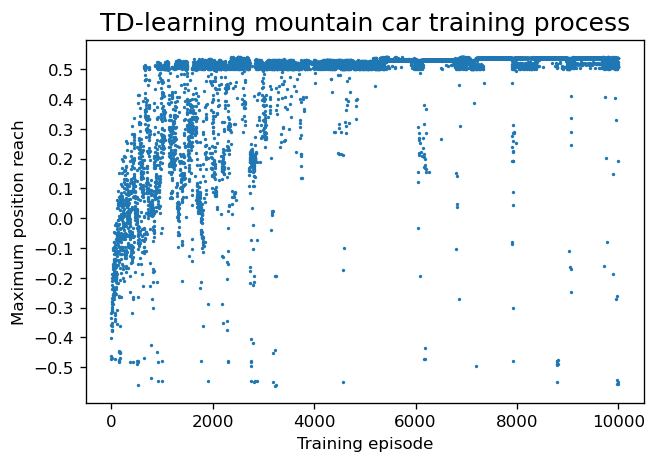

In [13]:
#Scatter for a better observation of the TD(0)-learning method performance
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4), dpi=120)
plt.scatter(x, y,1)

#Name the elements
plt.title('TD-learning mountain car training process', fontsize=15)
plt.xlabel('Training episode', fontsize=10)
plt.ylabel('Maximum position reach', fontsize=10)

plt.yticks(np.arange(-0.5, 0.6,0.1))